<h1><b>Analysis for Chronic Diseases</b></h1>

<p>Following are the steps we followed for data analysis</p>

<p>1. Import the libraries</p>

In [10]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<p>2.Load the dataset.</p>

In [11]:
dataset=pd.read_csv('data/data.csv')

In [12]:
dataset.head(3)

,Indicator Category,Indicator,Year,Sex,Race/Ethnicity,Value,Place,BCHC Requested Methodology,Source,Methods,Notes,90% Confidence Level - Low,90% Confidence Level - High,95% Confidence Level - Low,95% Confidence Level - High
0,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,1.7,"Washington, DC",Age-Adjusted rate of opioid-related mortality ...,"D.C. Department of Health, Center for Policy, ...",NaN,This indicator is not exclusive of other drugs...,NaN,NaN,NaN,NaN
1,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.2,"Fort Worth (Tarrant County), TX",Age-adjusted rate of opioid-related mortality ...,National Center for Health Statistics,NaN,This indicator is not exclusive of other drugs...,NaN,NaN,1.5,3.0
2,Behavioral Health/Substance Abuse,Opioid-Related Unintentional Drug Overdose Mor...,2010,Both,All,2.3,"Oakland (Alameda County), CA",Age-adjusted rate of opioid-related mortality ...,CDC Wonder,Age-adjusted rate of opioid-related mortality ...,Data is for Alameda County. This indicator is ...,NaN,NaN,1.6,3.2


<p>Above we saw the column names and we might need to fix the spaces in the column names. In order to change that we
need to first know what are the actual names of the columns.</p>

<p>We do that using the pandas function <i>columns</i> to list all the columns</p>

In [13]:
dataset.columns

Index(['Indicator Category', 'Indicator', 'Year', 'Sex', 'Race/Ethnicity',
       'Value', 'Place', 'BCHC Requested Methodology', 'Source', 'Methods',
       'Notes', '90% Confidence Level - Low', '90% Confidence Level - High',
       '95% Confidence Level - Low', '95% Confidence Level - High'],
      dtype='object')

<p>Now we rename the columns</p>

In [17]:
dataset.rename(columns={'Indicator Category':'indicator_category','Indicator':'indicator','Year':'year', 'Sex':'sex', 'Race/Ethnicity':'race_ethnicity',
       'Value':'value', 'Place':'place', 'BCHC Requested Methodology':'bchc_req_meth', 'Source':'source', 'Methods':'methods',
       'Notes':'notes', '90% Confidence Level - Low':'90pc_con_lvl-low', '90% Confidence Level - High':'90pc_con_lvl-high',
       '95% Confidence Level - Low':'95pc_con_lvl-low','95% Confidence Level - High':'95pc_con_lvl-high'},inplace = True)

<p>3.Now we need to filter the data according to the indicator category. We use one of the values "Cancer".</p>

In [18]:
chronic_dis_ds = dataset.loc[dataset["indicator_category"] == "Chronic Disease"]

<p>4.And then we remove empty columns and unnecessary columns</p>

In [19]:
chronic_dis_ds.drop(['indicator_category','bchc_req_meth','source','methods','notes','90pc_con_lvl-low','90pc_con_lvl-high'],
                    axis = 1, inplace= True)

<p>5. Now we remove all the rows which has NaN or NA values</p>

In [20]:
chronic_dis_ds.dropna(axis=0, how='any',inplace= True)

In [31]:
chronic_dis_ds.to_csv("data/chronic_disease.csv")

In [22]:
chronic_dis_ds.head(3)

,indicator,year,sex,race_ethnicity,value,place,95pc_con_lvl-low,95pc_con_lvl-high
4136,Asthma Emergency Department Visit Rate (Age-Ad...,2010,Both,All,99.4,"Chicago, Il",98.1,100.6
4137,Asthma Emergency Department Visit Rate (Age-Ad...,2010,Both,All,109.0,"Las Vegas (Clark County), NV",107.5,110.5
4139,Asthma Emergency Department Visit Rate (Age-Ad...,2010,Both,Asian/PI,12.9,"Chicago, Il",10.8,15.1


<h1>Analysis</h1>

First we'll see how many patients have been reported for cancer in respective years from 2010 to 2016. 

Following is the process to do the same

In [23]:
c_year_2010=chronic_dis_ds[chronic_dis_ds['year']==2010]
c_year_2010_count=c_year_2010['year'].count()


In [24]:
c_year_2010.shape

(201, 8)

In [25]:
c_year_2011=chronic_dis_ds[chronic_dis_ds['year']==2011]
c_year_2011_count=c_year_2011['year'].count()

c_year_2012=chronic_dis_ds[chronic_dis_ds['year']==2012]
c_year_2012_count=c_year_2012['year'].count()

c_year_2013=chronic_dis_ds[chronic_dis_ds['year']==2013]
c_year_2013_count=c_year_2013['year'].count()

c_year_2014=chronic_dis_ds[chronic_dis_ds['year']==2014]
c_year_2014_count=c_year_2014['year'].count()

c_year_2015=chronic_dis_ds[chronic_dis_ds['year']==2015]
c_year_2015_count=c_year_2015['year'].count()

c_year_2016=chronic_dis_ds[chronic_dis_ds['year']==2016]
c_year_2016_count=c_year_2016['year'].count()


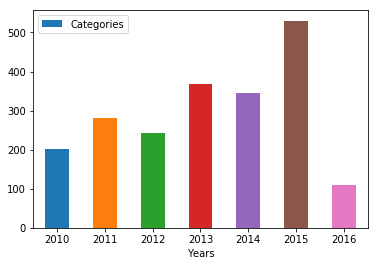

In [26]:
fig1 = pd.DataFrame({'Years':['2010', '2011', '2012','2013','2014','2015','2016'], 'Categories':[c_year_2010_count, c_year_2011_count,c_year_2012_count, c_year_2013_count,c_year_2014_count,c_year_2015_count,c_year_2016_count]})
ax = fig1.plot.bar(x='Years', y='Categories', rot=0)

<p>Now we calculate the number of cases for each type of cancer. In order to that we will group according to the 
indicator and take the count.</p>

In [27]:
sorted_cd = chronic_dis_ds['indicator'].value_counts()
sorted_cd

Percent of Adults Who Are Obese                                                      392
Heart Disease Mortality Rate (Age-Adjusted; Per 100,000 people)                      390
Diabetes Mortality Rate (Age-Adjusted; Per 100,000 people)                           344
Percent of Adults Who Currently Smoke                                                297
Percent of Adults Who Meet CDC-Recommended Physical Activity Levels                  209
Percent of High School Students Who Are Obese                                        139
Percent of High School Students Who Currently Smoke                                  121
Percent of High School Students Who Meet CDC-Recommended Physical Activity Levels    101
Asthma Emergency Department Visit Rate (Age-Adjusted; Per 10,000)                     83
Name: indicator, dtype: int64

<p>And we plot a histogram to see.</p>

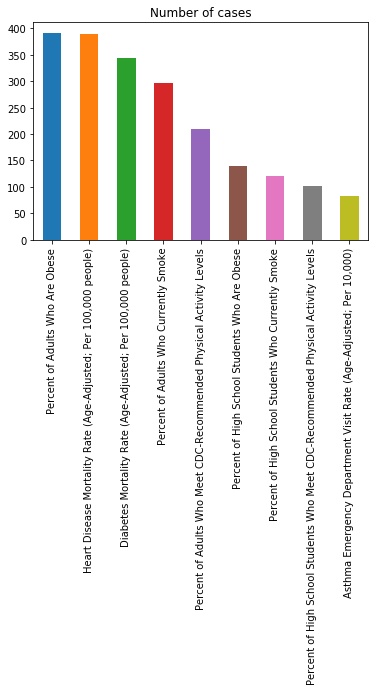

In [28]:
labels=list(chronic_dis_ds.columns)
sorted_cd = chronic_dis_ds['indicator'].value_counts().plot(title='Number of cases', kind='bar')
plt.show()
#label=list(group.columns)

Now we find out the distribution of cancer patients with respect to the race and ethnicity.

In [29]:
all=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="All"]
all_count=all.race_ethnicity.count()

asian=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="Asian/PI"]
asian_count=asian.race_ethnicity.count()

black=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="Black"]
black_count=black.race_ethnicity.count()

hispanic=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="Hispanic"]
hispanic_count=hispanic.race_ethnicity.count()

other=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="Other"]
other_count=other.race_ethnicity.count()

white=chronic_dis_ds[chronic_dis_ds['race_ethnicity']=="White"]
white_count=white.race_ethnicity.count()

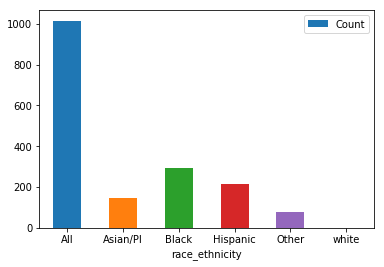

In [30]:
fig2 = pd.DataFrame({'race_ethnicity':['All', 'Asian/PI', 'Black','Hispanic','Other','White'], 'Count':[all_count, asian_count,black_count, hispanic_count,other_count,white_count]})
ax = fig2.plot.bar(x='race_ethnicity', y='Count', rot=0)